**Big Mart Sales Prediction**

**Train Dataset**- To be used for training of the model

**Test Dataset**- Used in making predictions


Do the following steps:
*   Exploratory Data Analysis
*   Pre-processing
* Modelling
* Fine-Tuning


**Goal**- To train multiple regression models using the different regression methods and see which model predicts the most accurate values





In [671]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [672]:
# Exploratory Data Analysis (EDA)

In [673]:
# Importing train dataset

In [674]:
data = pd.read_csv('/content/train_v9rqX0R.csv') # Train dataset
data.head()
DATA = data.copy()

In [675]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [676]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [677]:
data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [678]:
data.shape

(8523, 12)

In [679]:
data.isna().sum()  # Trying to find number of null values in each column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [680]:
(data.isnull().sum()/(len(data)))*100 # Percentage of null values in each column

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [681]:
# Data reduction - some columns can be dropped if they don't add much value to model creation
# We can drop 'Item_Identifier' & 'Outlet_Identifier' as it doesn't provide useful information towards training our model
data = data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [682]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [683]:
# Pre-Processing

In [684]:
# Handling missing values (Nan)

In [685]:
data.isna().sum()  # To to find number of null values in each column

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [686]:
data.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [687]:
# We have 1 categorical columns and 1 numerical columns with null values

In [688]:
# Missing values in 1 Object column and 1 Numerical column

# Numerical columns - mean/median
# Categorical - Mode

Text(0, 0.5, 'No: of people')

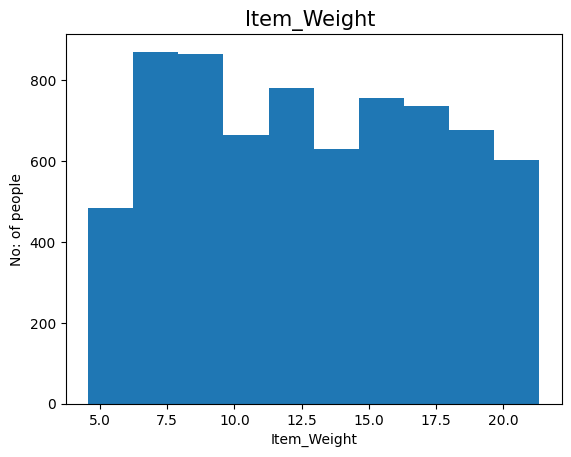

In [689]:
# For numerical column

plt.hist(data['Item_Weight'])
plt.title('Item_Weight ', fontsize=15)
plt.xlabel('Item_Weight')
plt.ylabel('No: of people')

In [690]:
# Since this is right skewed data, we will go with median

data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].median())

Text(0, 0.5, 'No: of people')

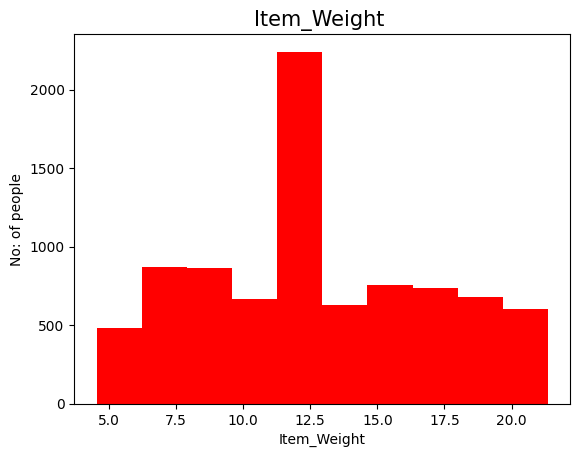

In [691]:
# Plotting 'Item_Weight' after filling missing values

plt.hist(data['Item_Weight'], color='red')
plt.title('Item_Weight ', fontsize=15)
plt.xlabel('Item_Weight')
plt.ylabel('No: of people')

In [692]:
# For Categorical column

d = data['Outlet_Size'].mode()
d

0    Medium
Name: Outlet_Size, dtype: object

In [693]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(d[0])

In [694]:
data.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [695]:
# Now we have filled missing values and we move onto handling outliers

In [696]:
# Outliers

In [697]:
data.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Text(0.5, 1.0, 'Item_Outlet_Sales')

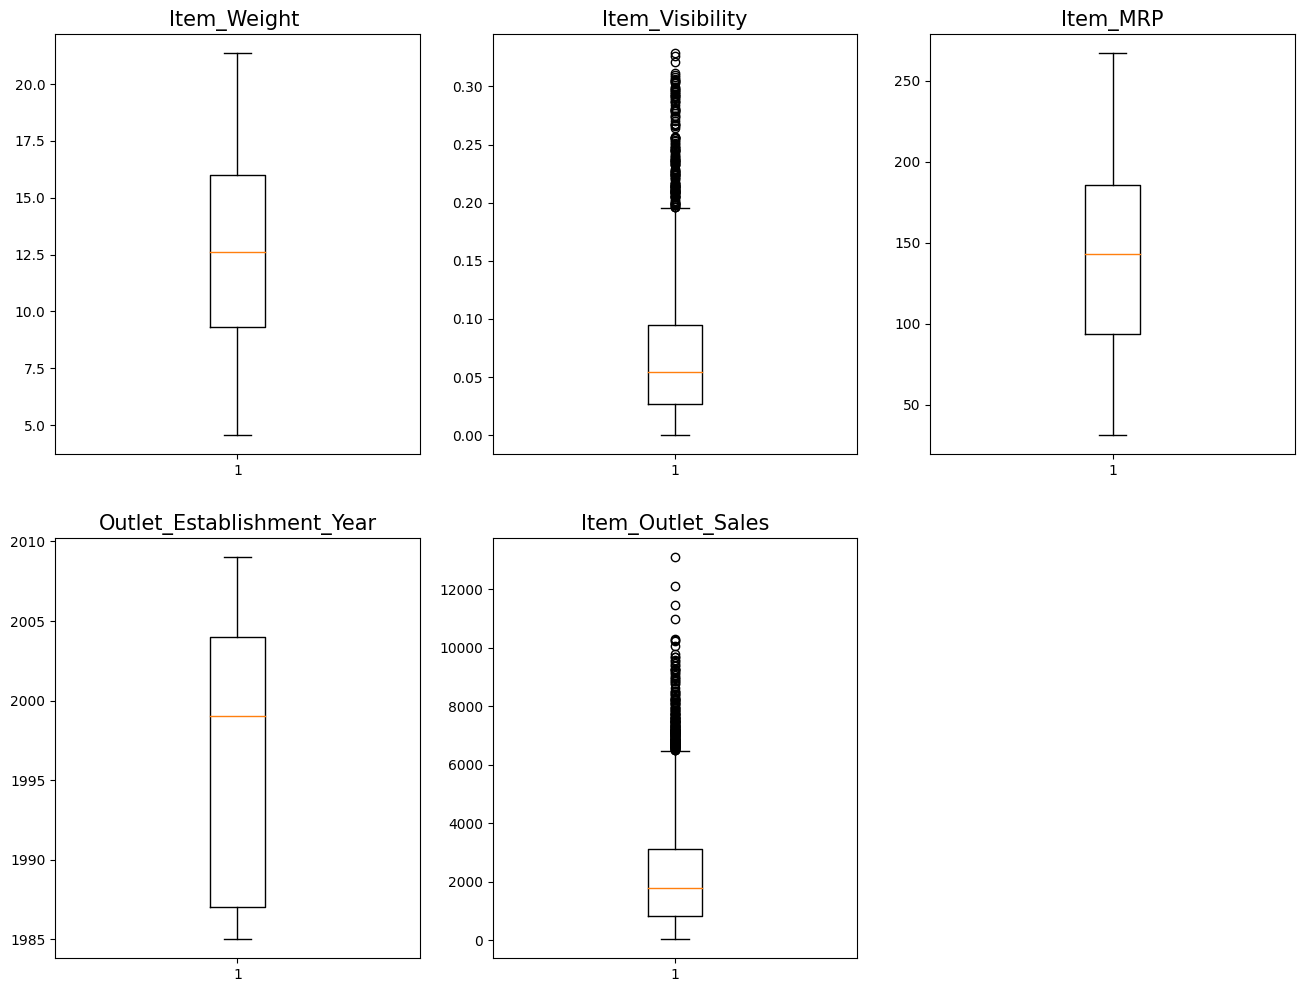

In [698]:
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
plt.boxplot(data['Item_Weight'])
plt.title('Item_Weight ', fontsize=15)

plt.subplot(2,3,2)
plt.boxplot(data['Item_Visibility'])
plt.title('Item_Visibility', fontsize=15)

plt.subplot(2,3,3)
plt.boxplot(data['Item_MRP'])
plt.title('Item_MRP', fontsize=15)

plt.subplot(2,3,4)
plt.boxplot(data['Outlet_Establishment_Year'])
plt.title('Outlet_Establishment_Year', fontsize=15)

plt.subplot(2,3,5)
plt.boxplot(data['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales', fontsize=15)

In [699]:
# 'Item_Visibility' and 'Item_Oulet_Sales' have outliers
# We shall use capping method to handle these

In [700]:
# Item_Visibility

In [701]:
Q1 = data['Item_Visibility'].quantile(0.25)
Q2 = data['Item_Visibility'].quantile(0.50)
Q3 = data['Item_Visibility'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-0.07440424500000001 0.195979015


In [702]:
data['Item_Visibility'] = np.where(data['Item_Visibility'] >= high, high, np.where(data['Item_Visibility'] <= low, low, data['Item_Visibility']))

In [703]:
# Item_Outlet_Sales

In [704]:
Q1 = data['Item_Outlet_Sales'].quantile(0.25)
Q2 = data['Item_Outlet_Sales'].quantile(0.50)
Q3 = data['Item_Outlet_Sales'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-2566.3261 6501.8699


In [705]:
data['Item_Outlet_Sales'] = np.where(data['Item_Outlet_Sales'] >= high, high, np.where(data['Item_Outlet_Sales'] <= low, low, data['Item_Outlet_Sales']))

In [706]:
# Plotting the dataset after removal of outliers

Text(0.5, 1.0, 'Item_Outlet_Sales')

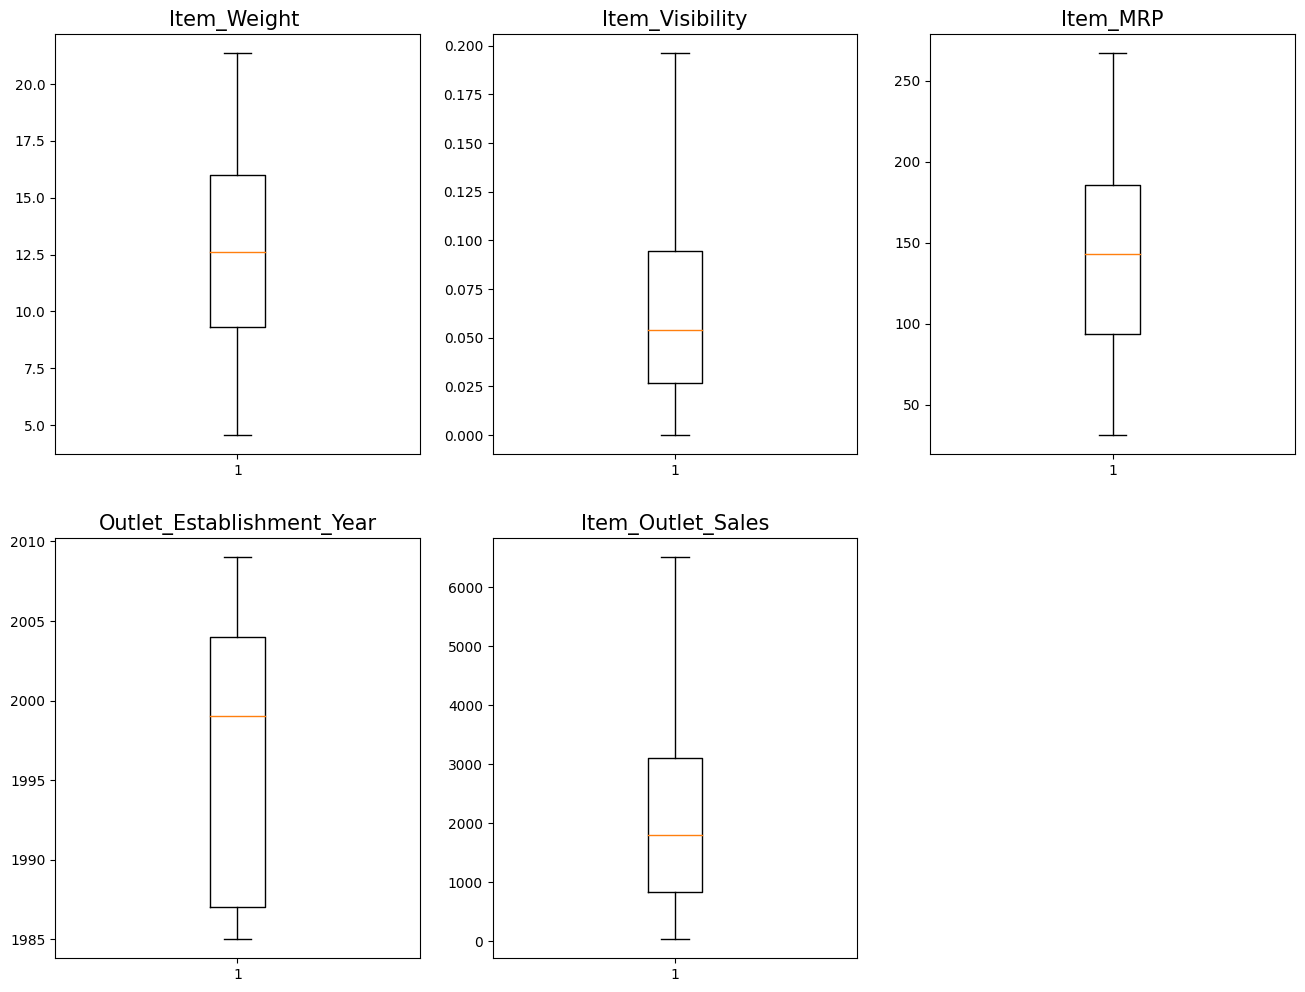

In [707]:
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
plt.boxplot(data['Item_Weight'])
plt.title('Item_Weight ', fontsize=15)

plt.subplot(2,3,2)
plt.boxplot(data['Item_Visibility'])
plt.title('Item_Visibility', fontsize=15)

plt.subplot(2,3,3)
plt.boxplot(data['Item_MRP'])
plt.title('Item_MRP', fontsize=15)

plt.subplot(2,3,4)
plt.boxplot(data['Outlet_Establishment_Year'])
plt.title('Outlet_Establishment_Year', fontsize=15)

plt.subplot(2,3,5)
plt.boxplot(data['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales', fontsize=15)

In [708]:
# Encoding
# We don't have to do Label Encoding for target column asit is already numerical column

# We do One-Hot encoding for the rest of the categorical columns

In [709]:
# One-Hot Encoding

data=pd.get_dummies(data)
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [710]:
# Scaling

# We do not do feature scaling for target column, this is especially dangerous in the case of regression models where the target column if scaled leads to incorrect information to model
# Feature scaling only in independent features and non-target columns

In [711]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.065307,140.992782,1997.831867,2156.313016,0.037076,0.597090,0.338965,0.013141,0.013728,...,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,4.22724,0.048841,62.275067,8.371760,1624.863069,0.188960,0.490512,0.473386,0.113885,0.116365,...,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,4.55500,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.35000,0.195979,266.888400,2009.000000,6501.869900,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [712]:
# Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [713]:
# We split the data into x and y where x stands for the feature variables and y stands for target variable
# This is used for scaling as well as later on for train_test_split

In [714]:
x = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] # Independent features
y = data['Item_Outlet_Sales']  # Target column

x.loc[:,['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year' ]] = sc.fit_transform(x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])

<ipython-input-714-3a160fc6646a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year' ]] = sc.fit_transform(x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])


In [715]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.831187,-1.008628,1.747454,0.139541
1,-1.630810,-0.942473,-1.489023,1.334103
2,1.108727,-0.994034,0.010040,0.139541
3,1.510904,-1.337208,0.660050,0.020085
4,-0.918719,-1.337208,-1.399220,-1.293934


**Importing Test Data**

In [716]:
# Now we shall import the test data and do all the necessary pre-processing steps

In [717]:
# Exploratory Data Analysis (EDA)

In [718]:
data_test = pd.read_csv('/content/test_AbJTz2l.csv') # Test dataset
data_test.head()
DATA_TEST = data_test.copy()

In [719]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [720]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [721]:
data_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [722]:
data_test.shape

(5681, 11)

In [723]:
data_test.isna().sum()  # Trying to find number of null values in each column

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [724]:
(data_test.isnull().sum()/(len(data_test)))*100 # Percentage of null values in each column

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [725]:
# Data reduction - some columns can be dropped if they don't add much value to model creation
# We can drop 'Item_Identifier' & 'Outlet_Identifier' as it doesn't provide useful information towards training our model
data_test = data_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
data_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [726]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                4075 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


In [727]:
# Pre-Processing

In [728]:
# Handling missing values (Nan)

In [729]:
data_test.isna().sum()  # To to find number of null values in each column

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [730]:
data_test.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [731]:
# We have 1 categorical columns and 1 numerical columns with null values

In [732]:
# Missing values in 1 Object column and 1 Numerical column

# Numerical columns - mean/median
# Categorical - Mode

Text(0, 0.5, 'No: of people')

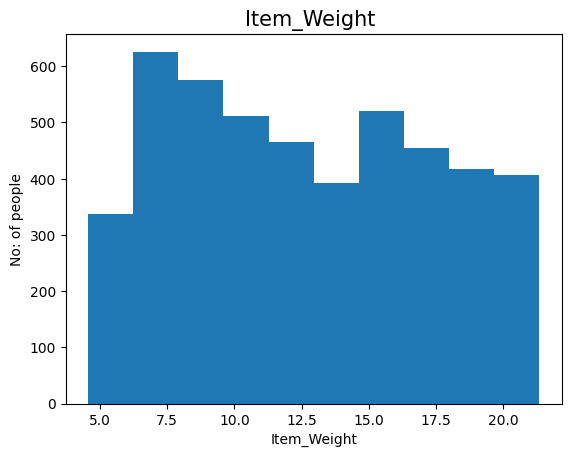

In [733]:
# For numerical column

plt.hist(data_test['Item_Weight'])
plt.title('Item_Weight ', fontsize=15)
plt.xlabel('Item_Weight')
plt.ylabel('No: of people')

In [734]:
# Since this is right skewed data, we will go with median

data_test['Item_Weight'] = data_test['Item_Weight'].fillna(data_test['Item_Weight'].median())

Text(0, 0.5, 'No: of people')

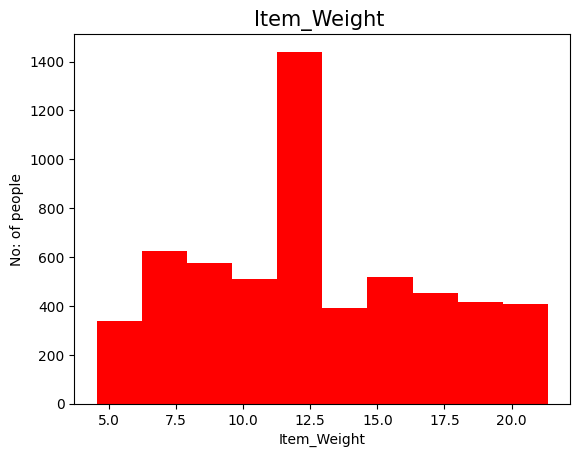

In [735]:
# Plotting 'Item_Weight' after filling missing values

plt.hist(data_test['Item_Weight'], color='red')
plt.title('Item_Weight ', fontsize=15)
plt.xlabel('Item_Weight')
plt.ylabel('No: of people')

In [736]:
# For Categorical column

d = data_test['Outlet_Size'].mode()
d

0    Medium
Name: Outlet_Size, dtype: object

In [737]:
data_test['Outlet_Size'] = data_test['Outlet_Size'].fillna(d[0])

In [738]:
data_test.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [739]:
# Now we have filled missing values and we move onto handling outliers

In [740]:
# Outliers

In [741]:
data_test.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Text(0.5, 1.0, 'Outlet_Establishment_Year')

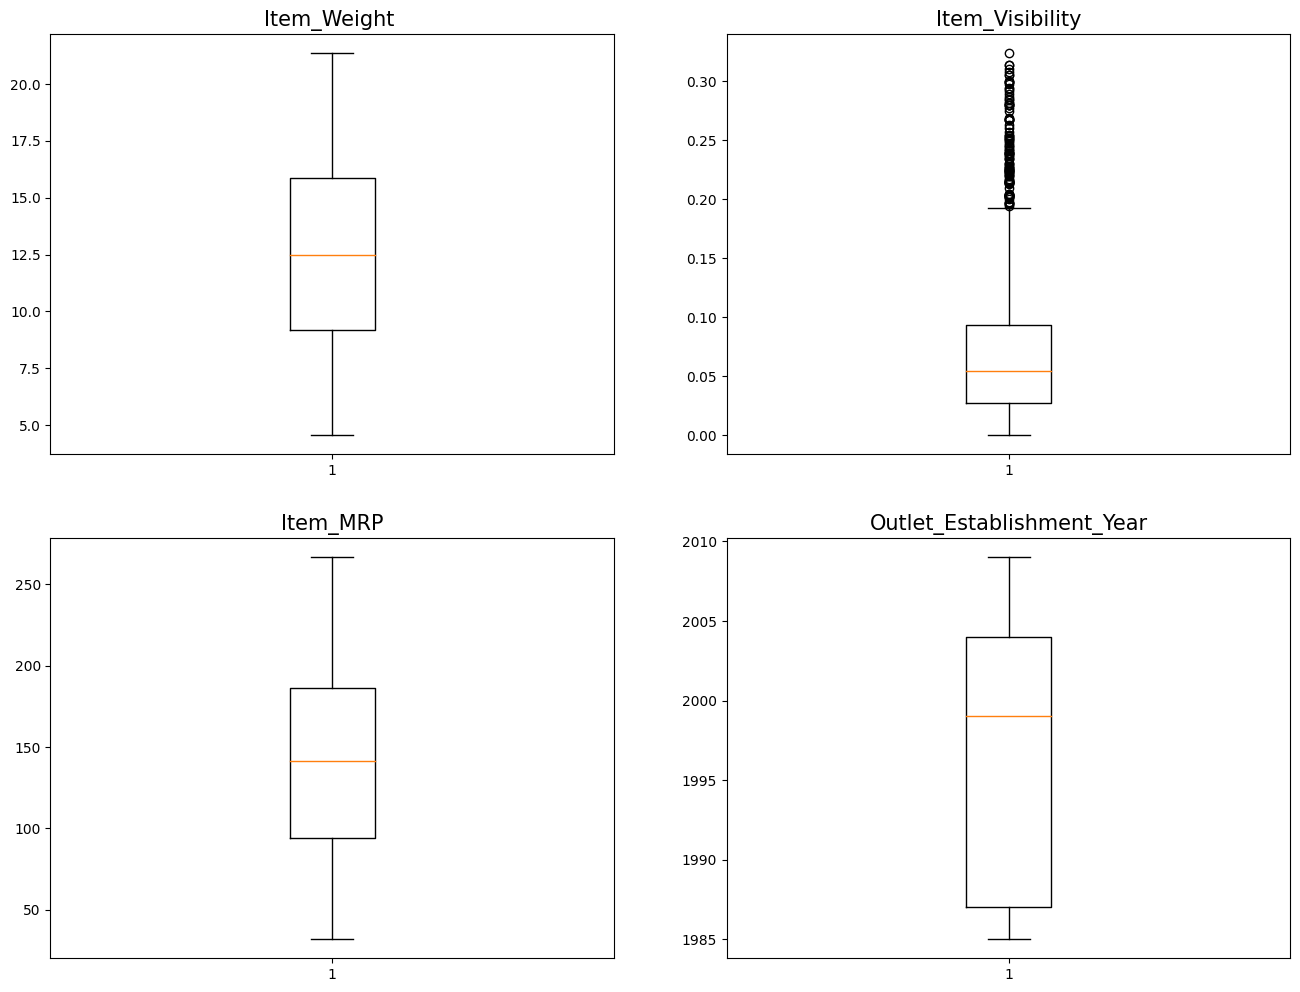

In [742]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.boxplot(data_test['Item_Weight'])
plt.title('Item_Weight ', fontsize=15)

plt.subplot(2,2,2)
plt.boxplot(data_test['Item_Visibility'])
plt.title('Item_Visibility', fontsize=15)

plt.subplot(2,2,3)
plt.boxplot(data_test['Item_MRP'])
plt.title('Item_MRP', fontsize=15)

plt.subplot(2,2,4)
plt.boxplot(data_test['Outlet_Establishment_Year'])
plt.title('Outlet_Establishment_Year', fontsize=15)


In [743]:
# 'Item_Visibility' has outliers
# We shall use capping method to handle these

In [744]:
# Item_Visibility

In [745]:
Q1 = data_test['Item_Visibility'].quantile(0.25)
Q2 = data_test['Item_Visibility'].quantile(0.50)
Q3 = data_test['Item_Visibility'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-0.072576747 0.193086245


In [746]:
data_test['Item_Visibility'] = np.where(data_test['Item_Visibility'] >= high, high, np.where(data_test['Item_Visibility'] <= low, low, data_test['Item_Visibility']))

In [747]:
# Plotting the dataset after removal of outliers

Text(0.5, 1.0, 'Outlet_Establishment_Year')

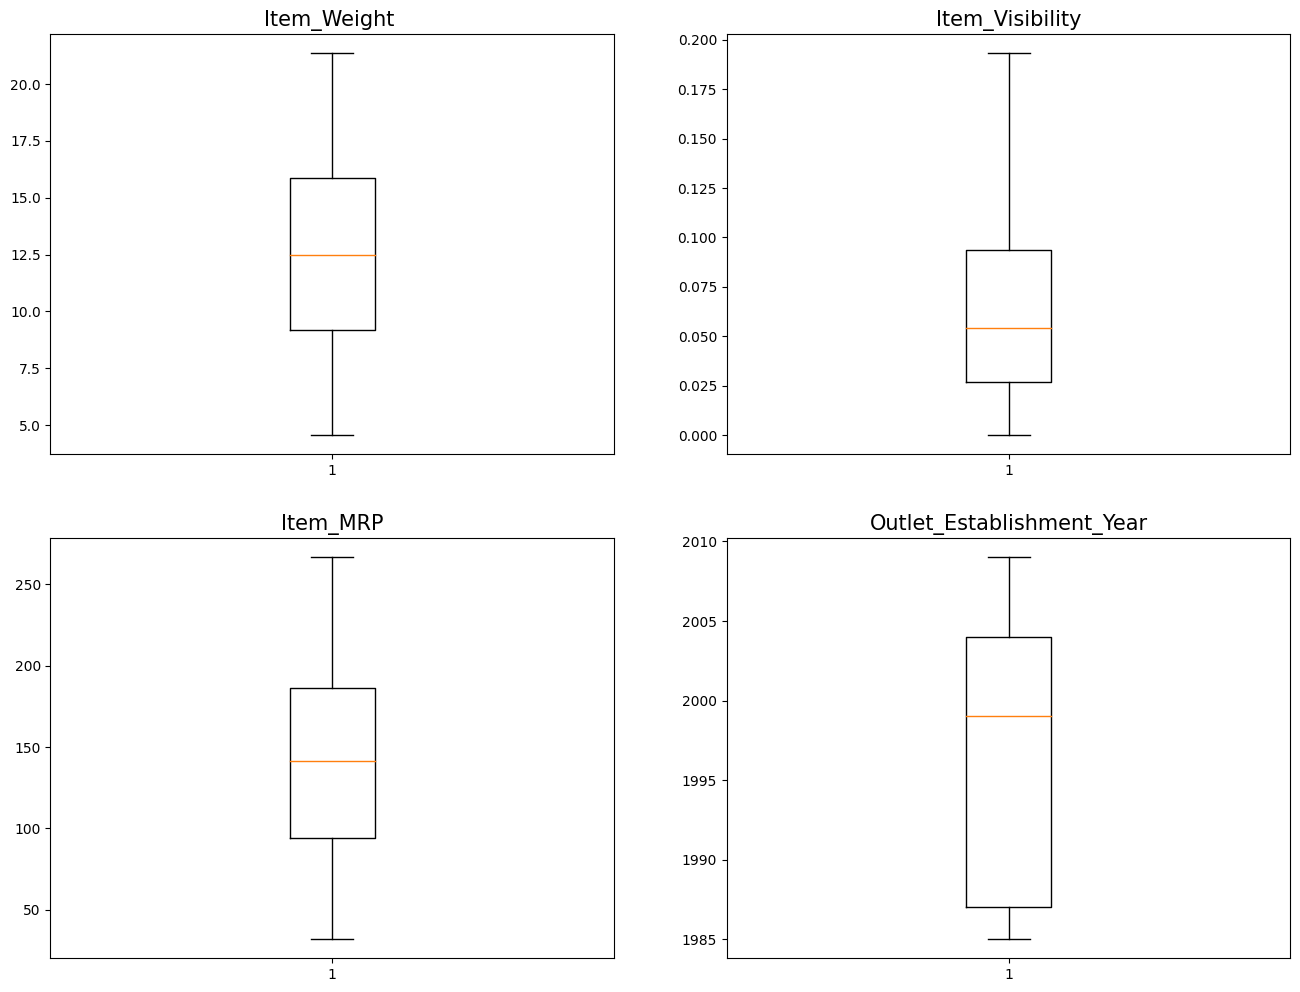

In [748]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.boxplot(data_test['Item_Weight'])
plt.title('Item_Weight ', fontsize=15)

plt.subplot(2,2,2)
plt.boxplot(data_test['Item_Visibility'])
plt.title('Item_Visibility', fontsize=15)

plt.subplot(2,2,3)
plt.boxplot(data_test['Item_MRP'])
plt.title('Item_MRP', fontsize=15)

plt.subplot(2,2,4)
plt.boxplot(data_test['Outlet_Establishment_Year'])
plt.title('Outlet_Establishment_Year', fontsize=15)

In [749]:
# Encoding

# We do One-Hot encoding for the rest of the categorical columns

In [750]:
# One-Hot Encoding

data_test=pd.get_dummies(data)
data_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [751]:
# Scaling

# We do not do feature scaling for target column, this is especially dangerous in the case of regression models where the target column if scaled leads to incorrect information to model
# Feature scaling only in independent features and non-target columns

In [752]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.065307,140.992782,1997.831867,2156.313016,0.037076,0.597090,0.338965,0.013141,0.013728,...,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,4.22724,0.048841,62.275067,8.371760,1624.863069,0.188960,0.490512,0.473386,0.113885,0.116365,...,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,4.55500,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.35000,0.195979,266.888400,2009.000000,6501.869900,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [753]:
# Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [754]:
data_test = data_test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

data_test.loc[:,['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year' ]] = sc.fit_transform(data_test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])

<ipython-input-754-ab9dac2b28ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.loc[:,['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year' ]] = sc.fit_transform(data_test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])


In [755]:
data_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.831187,-1.008628,1.747454,0.139541
1,-1.630810,-0.942473,-1.489023,1.334103
2,1.108727,-0.994034,0.010040,0.139541
3,1.510904,-1.337208,0.660050,0.020085
4,-0.918719,-1.337208,-1.399220,-1.293934


In [756]:
# Now that we have done Pre-Processing for both Train Data as well as Test Data, we can move onto model creation, evaluation and testing

In [757]:
# Model will be Created and Evaluated with Train Data
# Model will be Tested with Test Data

In [758]:
# Splitting data as training and testing data
# 80% of dataset is used for training the model while 20% data is used for testing the model

In [759]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2, random_state=42)

In [760]:
x_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
549,-0.783872,-0.616343,0.487415,0.139541
7757,1.227014,-0.365161,0.474526,0.497909
764,1.132384,0.221442,-0.470081,-0.099372
6867,-1.061847,-0.726105,-1.595901,0.497909
2716,0.008654,1.472632,0.233979,-0.099372
...,...,...,...,...
5734,-0.808712,2.675605,-0.029050,0.020085
5191,0.659235,1.070216,-1.049049,1.095190
5390,1.132384,-0.949323,1.547519,0.497909
860,1.782965,-0.224093,-0.370092,1.095190


In [761]:
y_train

549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [762]:
# Importing algorithm files and creating model

In [763]:
# Linear Regression

In [764]:
from sklearn.linear_model import LinearRegression

In [765]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [766]:
y_pred = lr.predict(x_val)

In [767]:
from sklearn.metrics import mean_squared_error, r2_score

In [768]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 1642228.0572415038
R2 Score: 0.3441547393673847


In [769]:
# Testing the accuracy of model using test dataset

In [770]:
y_pred_test = lr.predict(data_test)

In [771]:
# Creating a new .csv file with features, 'Item_Identifier', 'Outlet_Identifier' and store the predicted values in a target column 'Item_Outlet_Sales'

LR = pd.DataFrame(DATA_TEST[['Item_Identifier','Outlet_Identifier']])
LR['Item_Outlet_Sales'] = y_pred_test[0:5681]
LR.Item_Outlet_Sales.abs()
LR.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,4004.166587
1,FDW14,OUT017,876.358142
2,NCN55,OUT010,2356.061823
3,FDQ58,OUT017,3040.350007
4,FDY38,OUT027,1268.377396


In [772]:
LR.to_csv('Predictions_LR.csv', index=False)

In [773]:
# Decision Tree Regressor

In [774]:
from sklearn.tree import DecisionTreeRegressor

In [775]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [776]:
y_pred = dtr.predict(x_val)

In [777]:
from sklearn.metrics import mean_squared_error, r2_score

In [778]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 2943594.4103663284
R2 Score: -0.17556294008653106


In [779]:
# Testing the accuracy of model using test dataset

In [780]:
y_pred_test = dtr.predict(data_test)

In [781]:
# Creating a new .csv file with features, 'Item_Identifier', 'Outlet_Identifier' and store the predicted values in a target column 'Item_Outlet_Sales'

DTR = pd.DataFrame(DATA_TEST[['Item_Identifier','Outlet_Identifier']])
DTR['Item_Outlet_Sales'] = y_pred_test[0:5681]

DTR.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,3735.1380
1,FDW14,OUT017,443.4228
2,NCN55,OUT010,2097.2700
3,FDQ58,OUT017,732.3800
4,FDY38,OUT027,994.7052


In [782]:
DTR.to_csv('Predictions_DTR.csv', index=False)

In [783]:
# Decision Tree Regressor after Fine-Tuning


In [790]:
# Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_depth': [3, None],
              'max_features': np.arange(1, 9),
              'min_samples_leaf': np.arange(1, 9),
              'min_samples_split': np.arange(2, 9),
              'splitter': ['best', 'random']}



In [792]:
random_search = RandomizedSearchCV(dtr, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [793]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, None],
                                        'max_features': array([1, 2, 3, 4, 5, 6, 7, 8]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8]),
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [795]:
best_params = random_search.best_params_
print(f'Best Parameters: {best_params}')

score = random_search.score(x_val, y_val)
print(f'Score: {score}')

Best Parameters: {'splitter': 'random', 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 5, 'max_depth': None}
Score: 0.39246239130300775


In [796]:
# Computing Decision tree Regressor with fine tuned values

In [799]:
dtr1 = DecisionTreeRegressor(splitter= 'random', min_samples_split=4, min_samples_leaf= 8, max_features= 5, max_depth= None)
dtr1.fit(x_train, y_train)

DecisionTreeRegressor(max_features=5, min_samples_leaf=8, min_samples_split=4,
                      splitter='random')

In [800]:
y_pred = dtr1.predict(x_val)

In [801]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 1603364.1346981064
R2 Score: 0.35967555530843875


In [802]:
# Testing the accuracy of model using test dataset

In [803]:
y_pred_test = dtr1.predict(data_test)

In [804]:
# Creating a new .csv file with features, 'Item_Identifier', 'Outlet_Identifier' and store the predicted values in a target column 'Item_Outlet_Sales'

DTR = pd.DataFrame(DATA_TEST[['Item_Identifier','Outlet_Identifier']])
DTR['Item_Outlet_Sales'] = y_pred_test[0:5681]

DTR.head()
DTR.to_csv('Predictions_DTR1.csv', index=False)

In [805]:
# Random Forest Regressor method - Randomized Search CV



In [806]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [807]:
rf = RandomForestRegressor(random_state=42)

# Define the parameters for Randomized Search
param_dist = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

In [808]:
# Setting up Randomized Search CV
n_iter_search = 20
rf_random = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=n_iter_search, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [810]:
# Train the model with Randomized Search CV

rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [811]:
best_params = rf_random.best_params_
print(f'Best Parameters: {best_params}')

score = rf_random.score(x_val, y_val)
print(f'Score: {score}')

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Score: 0.42486481718007474


In [812]:
# Random Forest Regressor method with fine tuned values

In [813]:
rf = RandomForestRegressor(n_estimators= 50, min_samples_split= 5, min_samples_leaf= 1, max_depth= 10, bootstrap=True)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=50)

In [814]:
y_pred = rf.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 1437319.2989582936
R2 Score: 0.42598773289685443


In [815]:
# Testing the accuracy of model using test dataset

In [816]:
y_pred_test = rf.predict(data_test)

In [818]:
RF = pd.DataFrame(DATA_TEST[['Item_Identifier','Outlet_Identifier']])
RF['Item_Outlet_Sales'] = y_pred_test[0:5681]

RF.head()
RF.to_csv('Predictions_RF.csv', index=False)

In [819]:

# KNN Regressor method - Randomized Search CV

In [820]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

model = KNeighborsRegressor()
search = RandomizedSearchCV(model, param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

In [821]:
search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 10, 20],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='neg_mean_squared_error')

In [822]:
best_params = search.best_params_
print(f'Best Parameters: {best_params}')

score = search.score(x_val, y_val)
print(f'Score: {score}')

Best Parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 20}
Score: -1567648.6786959572


In [823]:
# KNN Regressor with Fine tuned Values

In [824]:
knr = KNeighborsRegressor(weights= 'uniform', p= 1, n_neighbors=20)
knr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20, p=1)

In [825]:
y_pred = knr.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 1567648.6786959572
R2 Score: 0.3739389899435088


In [826]:
# Testing the accuracy of model using test dataset

In [827]:
y_pred_test = knr.predict(data_test)

In [828]:
KNR = pd.DataFrame(DATA_TEST[['Item_Identifier','Outlet_Identifier']])
KNR['Item_Outlet_Sales'] = y_pred_test[0:5681]

KNR.head()
KNR.to_csv('Predictions_KNR.csv', index=False)

In [829]:
# Support Vector Machine Regressor - Randomized Search CV

In [832]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

model = SVR()
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 7),
    'gamma': np.logspace(-3, 3, 7),
    'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
    'shrinking': [True, False]
}

scoring = 'neg_mean_squared_error'

search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring=scoring, n_jobs=-1, random_state=42)

In [833]:
search.fit(x_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
best_params = search.best_params_
print(f'Best Parameters: {best_params}')

score = search.score(x_val, y_val)
print(f'Score: {score}')

In [ ]:
# Support Vector Machine Regressor with Fine tuned Values

In [ ]:
svr = SVR()
svr.fit(x_train, y_train)

In [ ]:
y_pred = svr.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

In [ ]:
#  Testing the accuracy of model using test dataset

In [ ]:
y_pred_test = svr.predict(data_test)

In [ ]:
SVR = pd.DataFrame(DATA_TEST[['Item_Identifier','Outlet_Identifier']])
SVR['Item_Outlet_Sales'] = y_pred_test[0:5681]

SVR.head()
SVR.to_csv('Predictions_SVR.csv', index=False)